In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import joblib
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# pretty printing
from pprint import pprint

# visualizing 
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot



In [2]:
loaded_model1 = joblib.load('../DTC/models_progress3/param1/dtc_split1.joblib')

In [3]:
loaded_model1

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       splitter='random')

In [4]:
loaded_model1.classes_

array([0, 1])

In [5]:
loaded_model1.tree_

In [6]:
print(export_graphviz(loaded_model1))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[9] <= -0.084\nentropy = 1.0\nsamples = 456\nvalue = [228, 228]"] ;
1 [label="X[0] <= -0.791\nentropy = 0.892\nsamples = 262\nvalue = [181, 81]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= -0.586\nentropy = 0.183\nsamples = 72\nvalue = [70, 2]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 55\nvalue = [55, 0]"] ;
2 -> 3 ;
4 [label="X[15] <= -0.041\nentropy = 0.523\nsamples = 17\nvalue = [15, 2]"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 14\nvalue = [14, 0]"] ;
4 -> 5 ;
6 [label="X[1] <= -0.059\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]"] ;
4 -> 6 ;
7 [label="entropy = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6 -> 8 ;
9 [label="X[13] <= 0.08\nentropy = 0.979\nsamples = 190\nvalue = [111, 79]"] ;
1 -> 9 ;
10 [label="X[3] <= -0.287\nentropy = 0.832\nsamples = 148\nvalue = [109, 39]"] ;

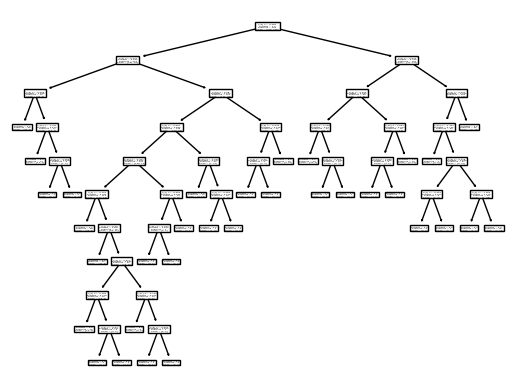

In [7]:
tree.plot_tree(loaded_model1);

In [8]:
train_path = "../kitt/DATA_progress3_new/split1/train/train_oversampling.csv"
train_data = pd.read_csv(train_path)
x_train = train_data[train_data.columns[2:]]
x_train.columns[9]

'concavity_se'

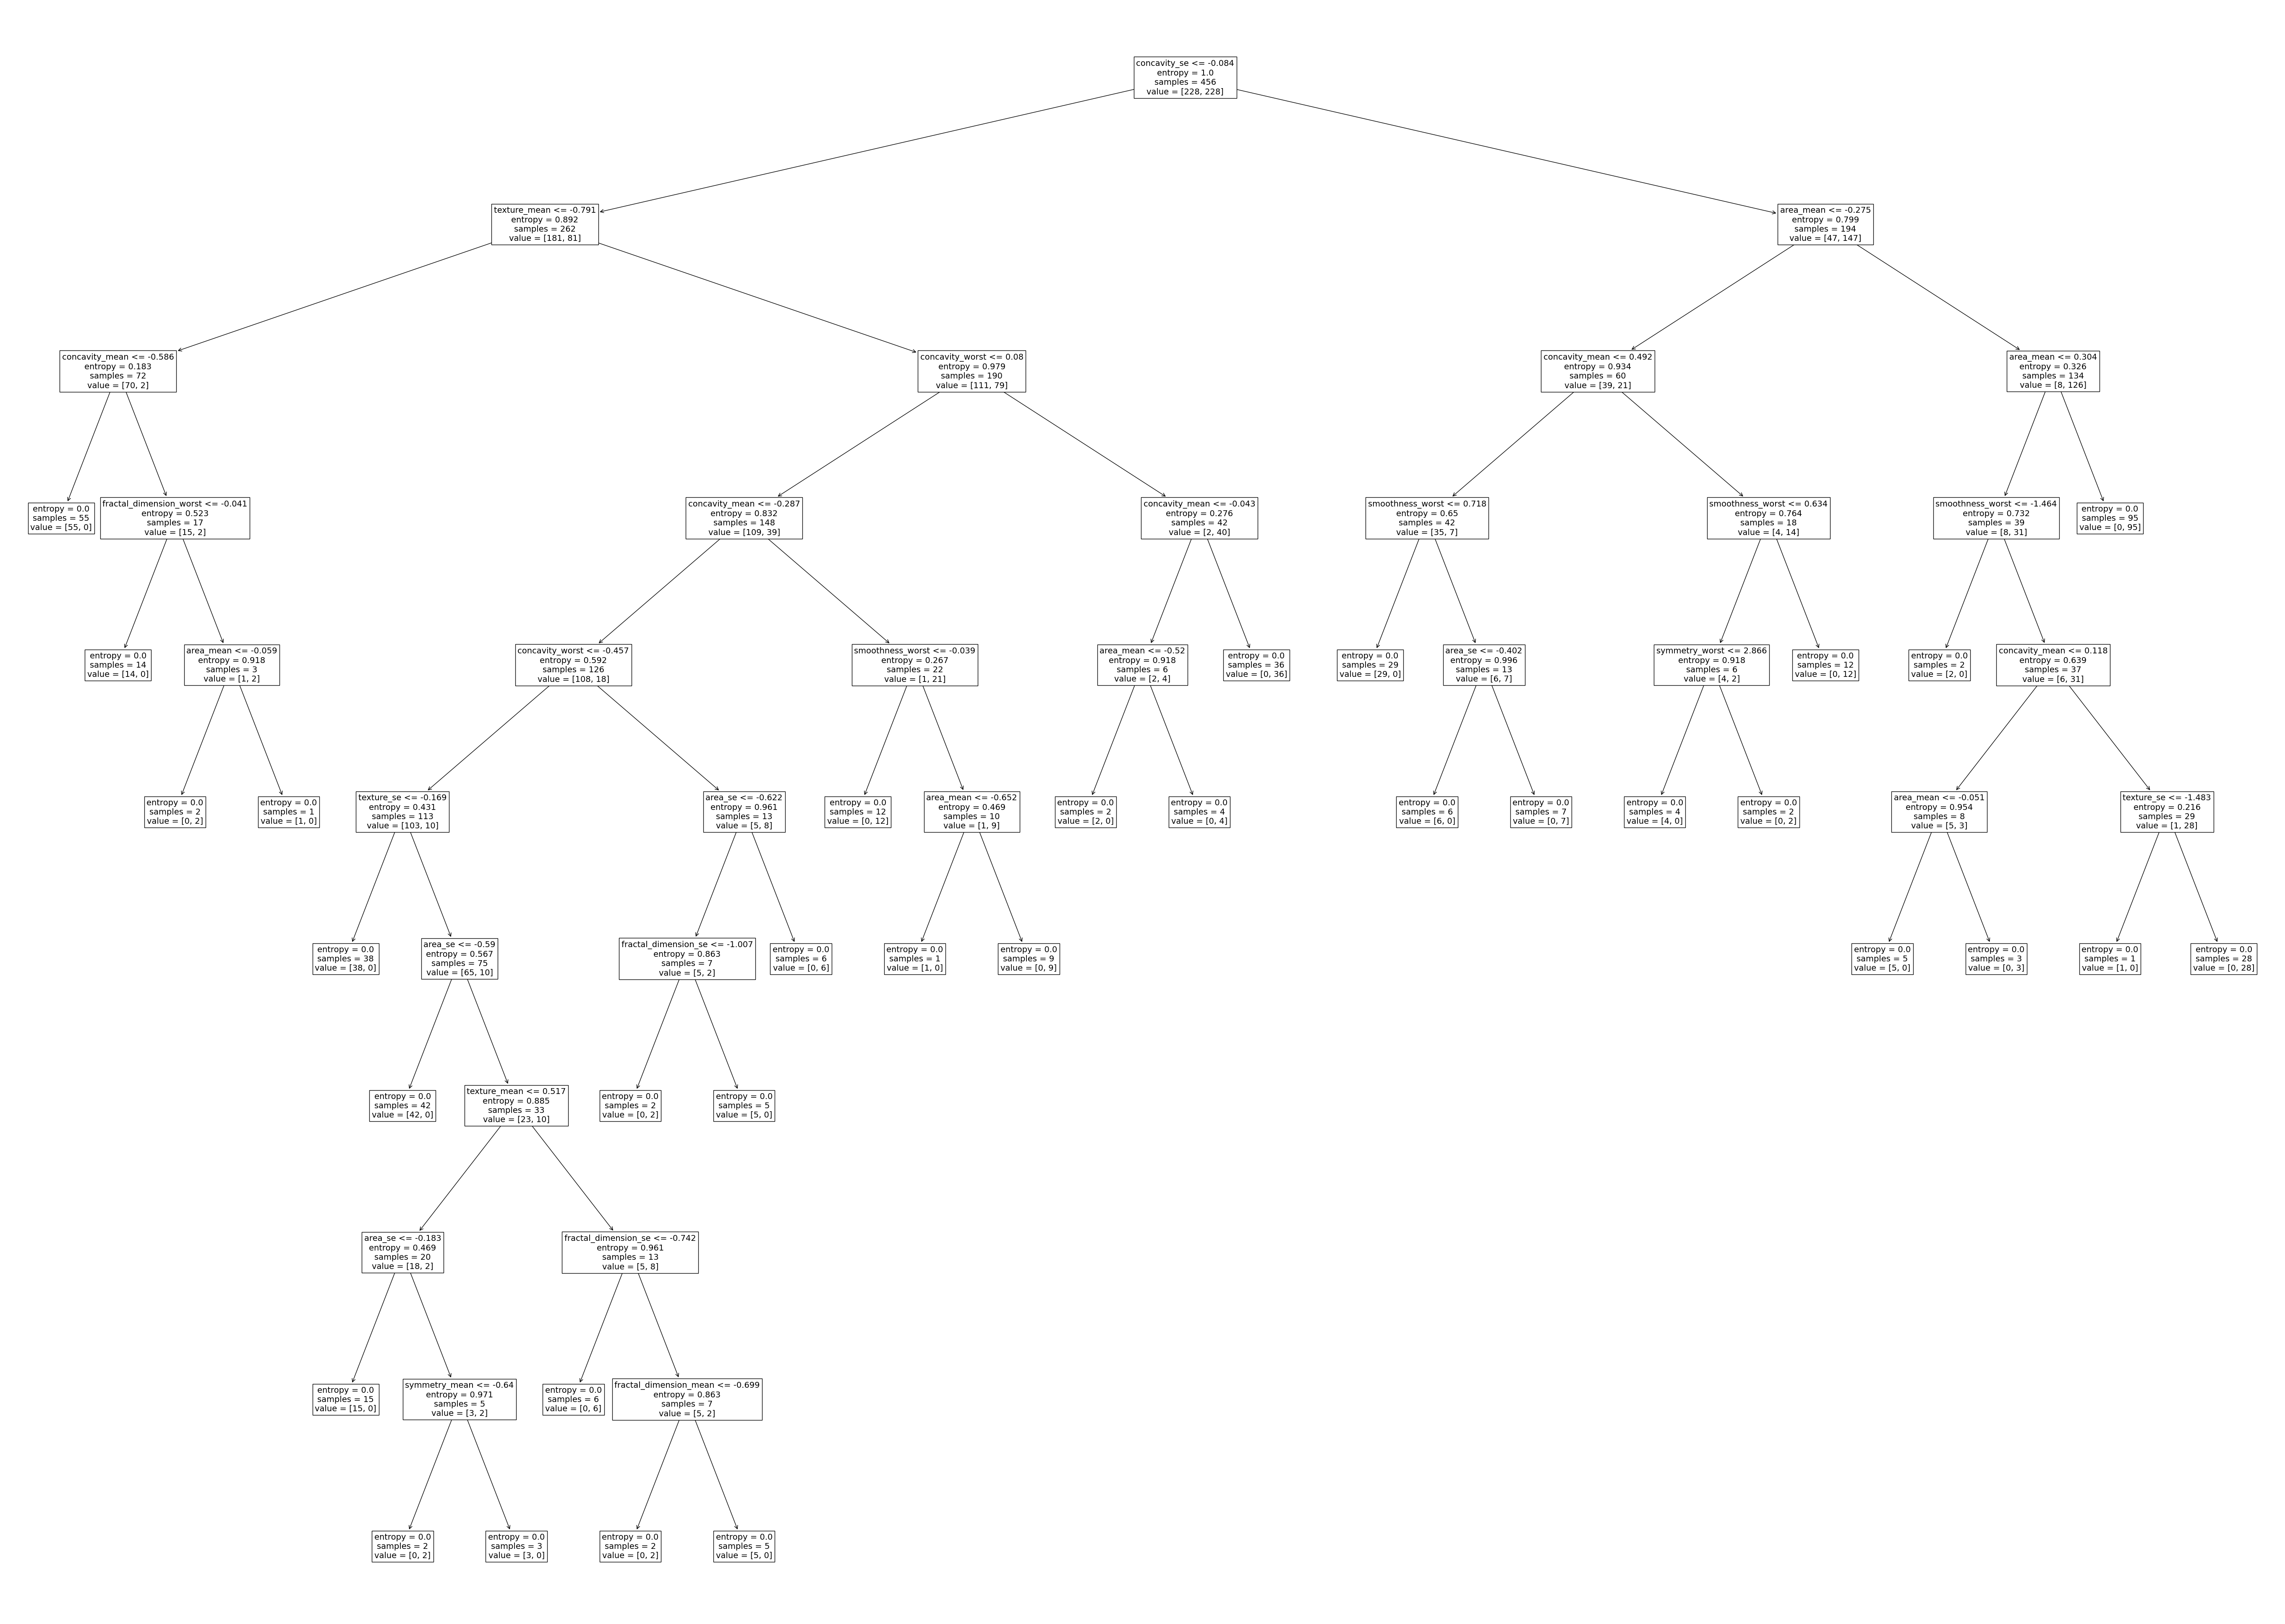

In [11]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(loaded_model1, feature_names=x_train.columns, fontsize=14)

In [12]:
loaded_model2 = joblib.load('../DTC/models_progress3/param1/dtc_split2.joblib')
loaded_model2

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       splitter='random')

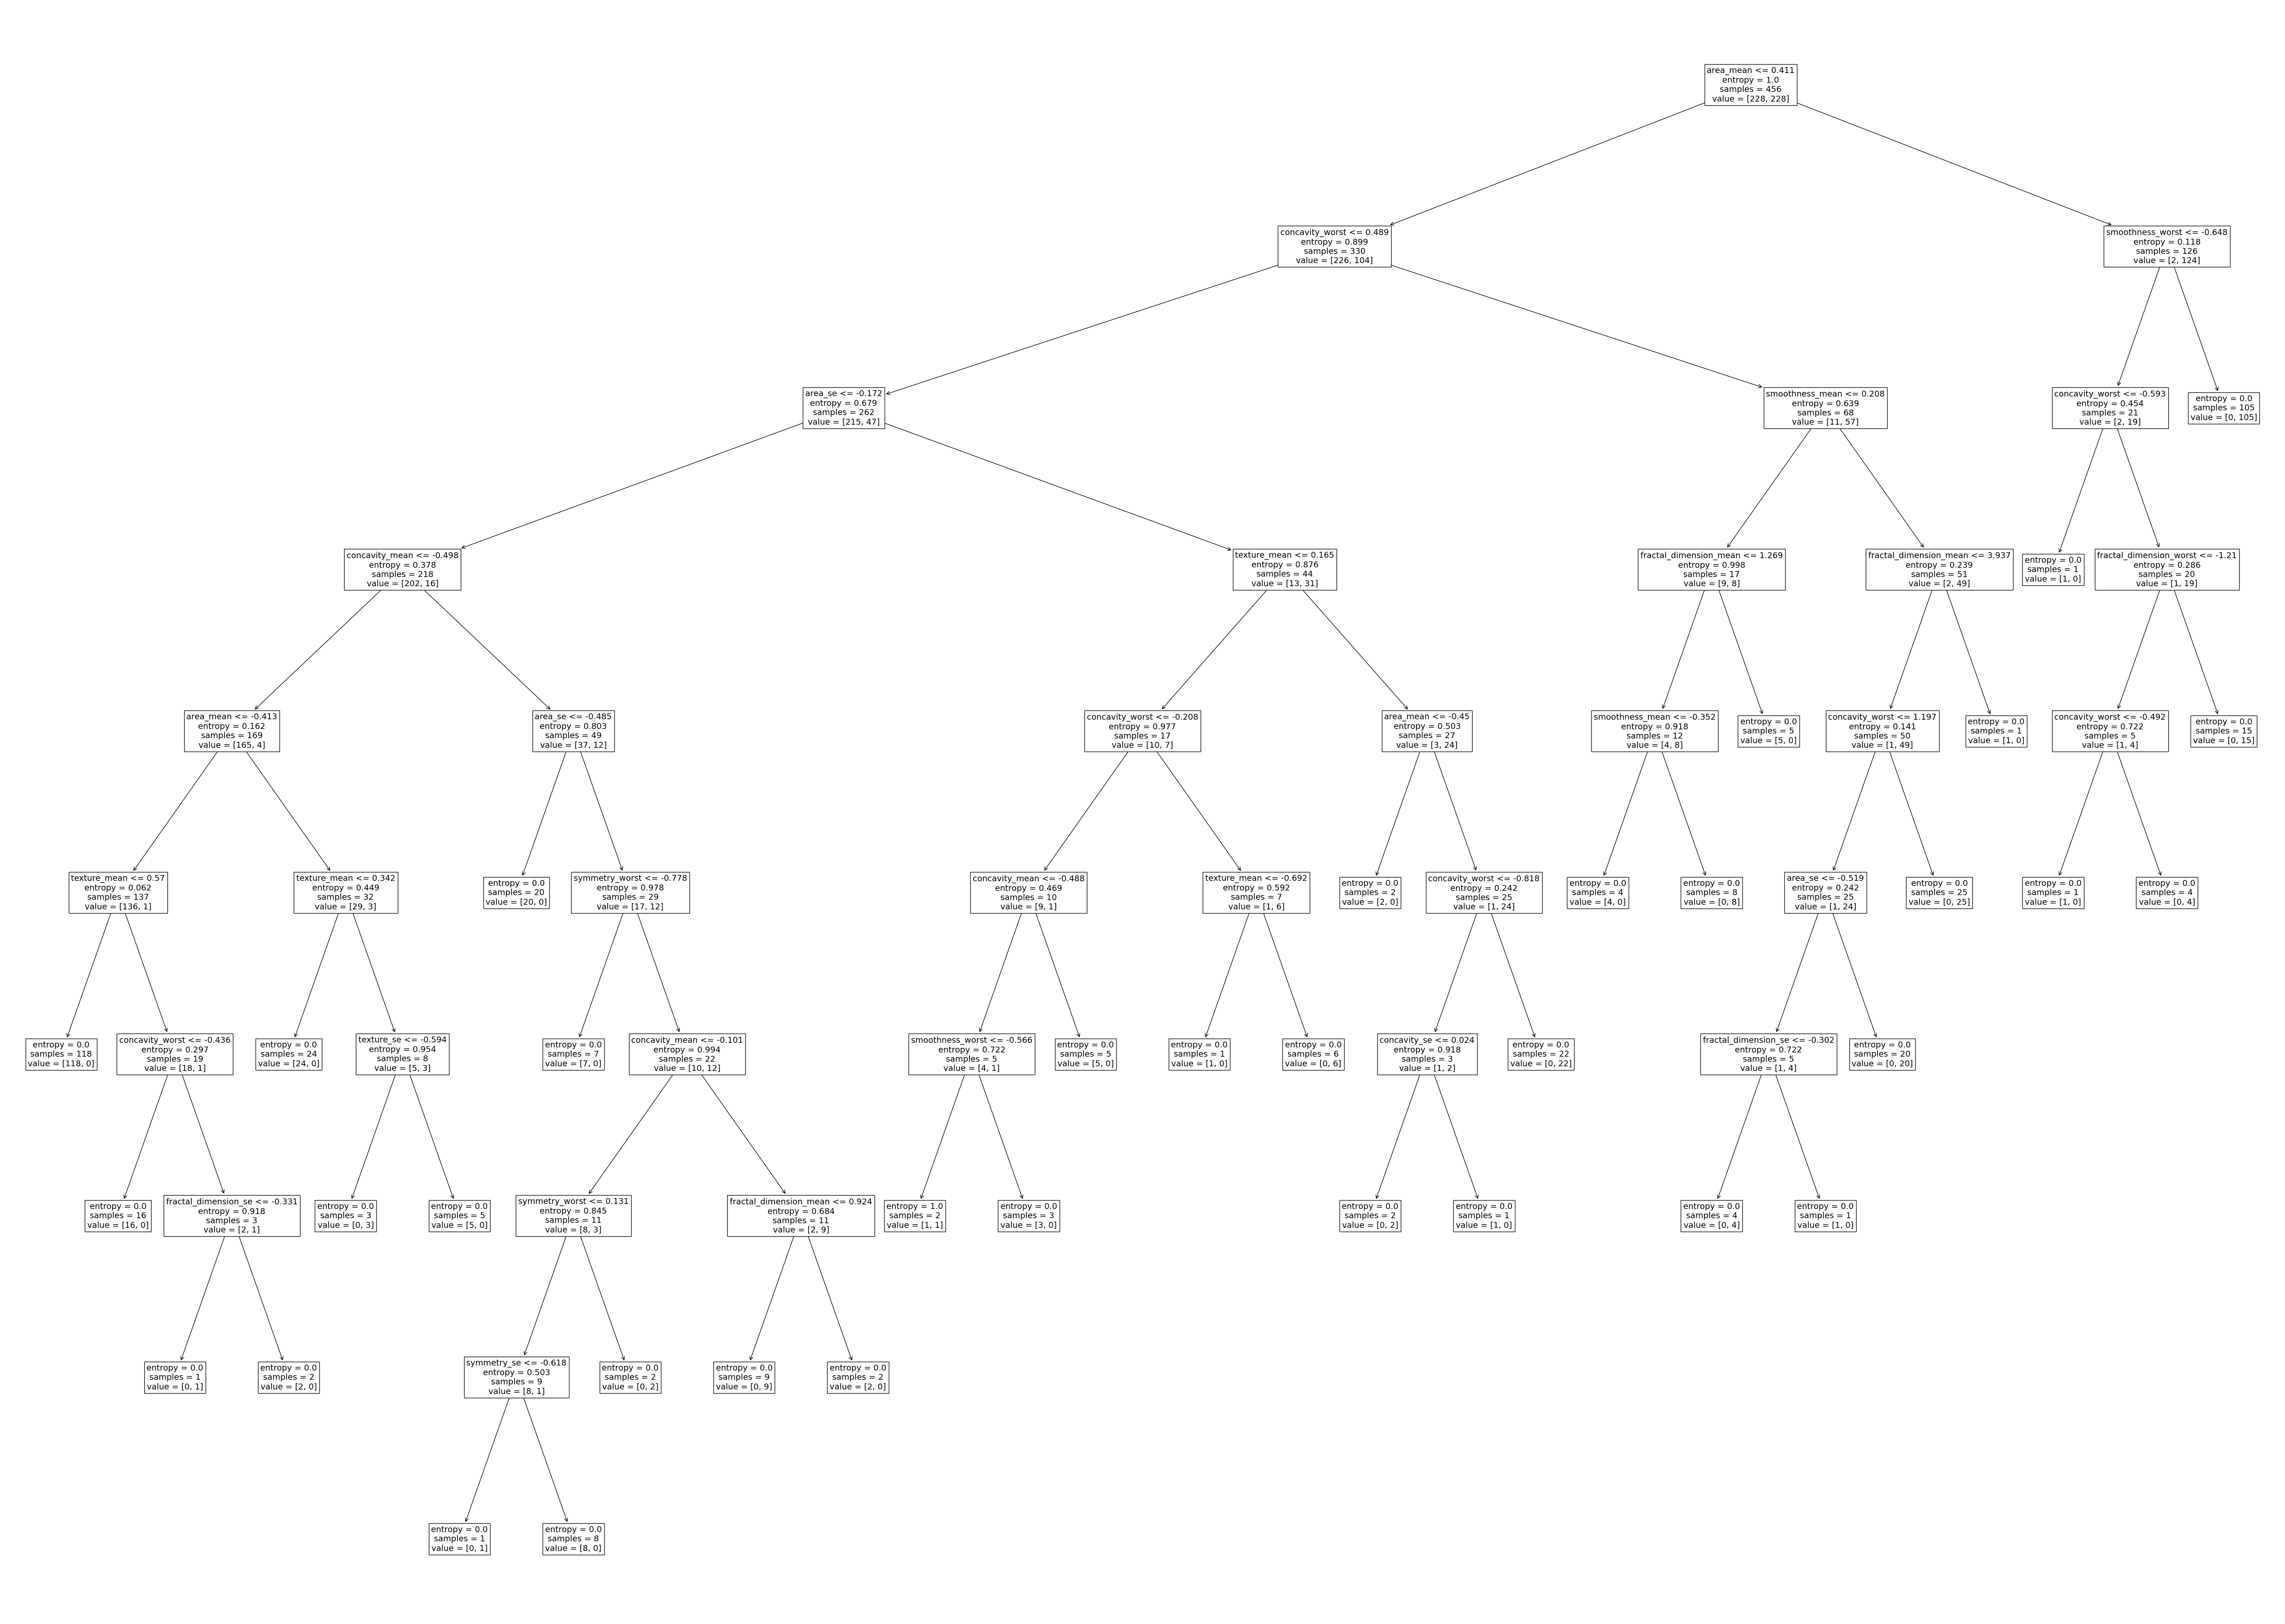

In [13]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(loaded_model2, feature_names=x_train.columns, fontsize=14)

In [14]:
loaded_model3 = joblib.load('../DTC/models_progress3/param1/dtc_split3.joblib')

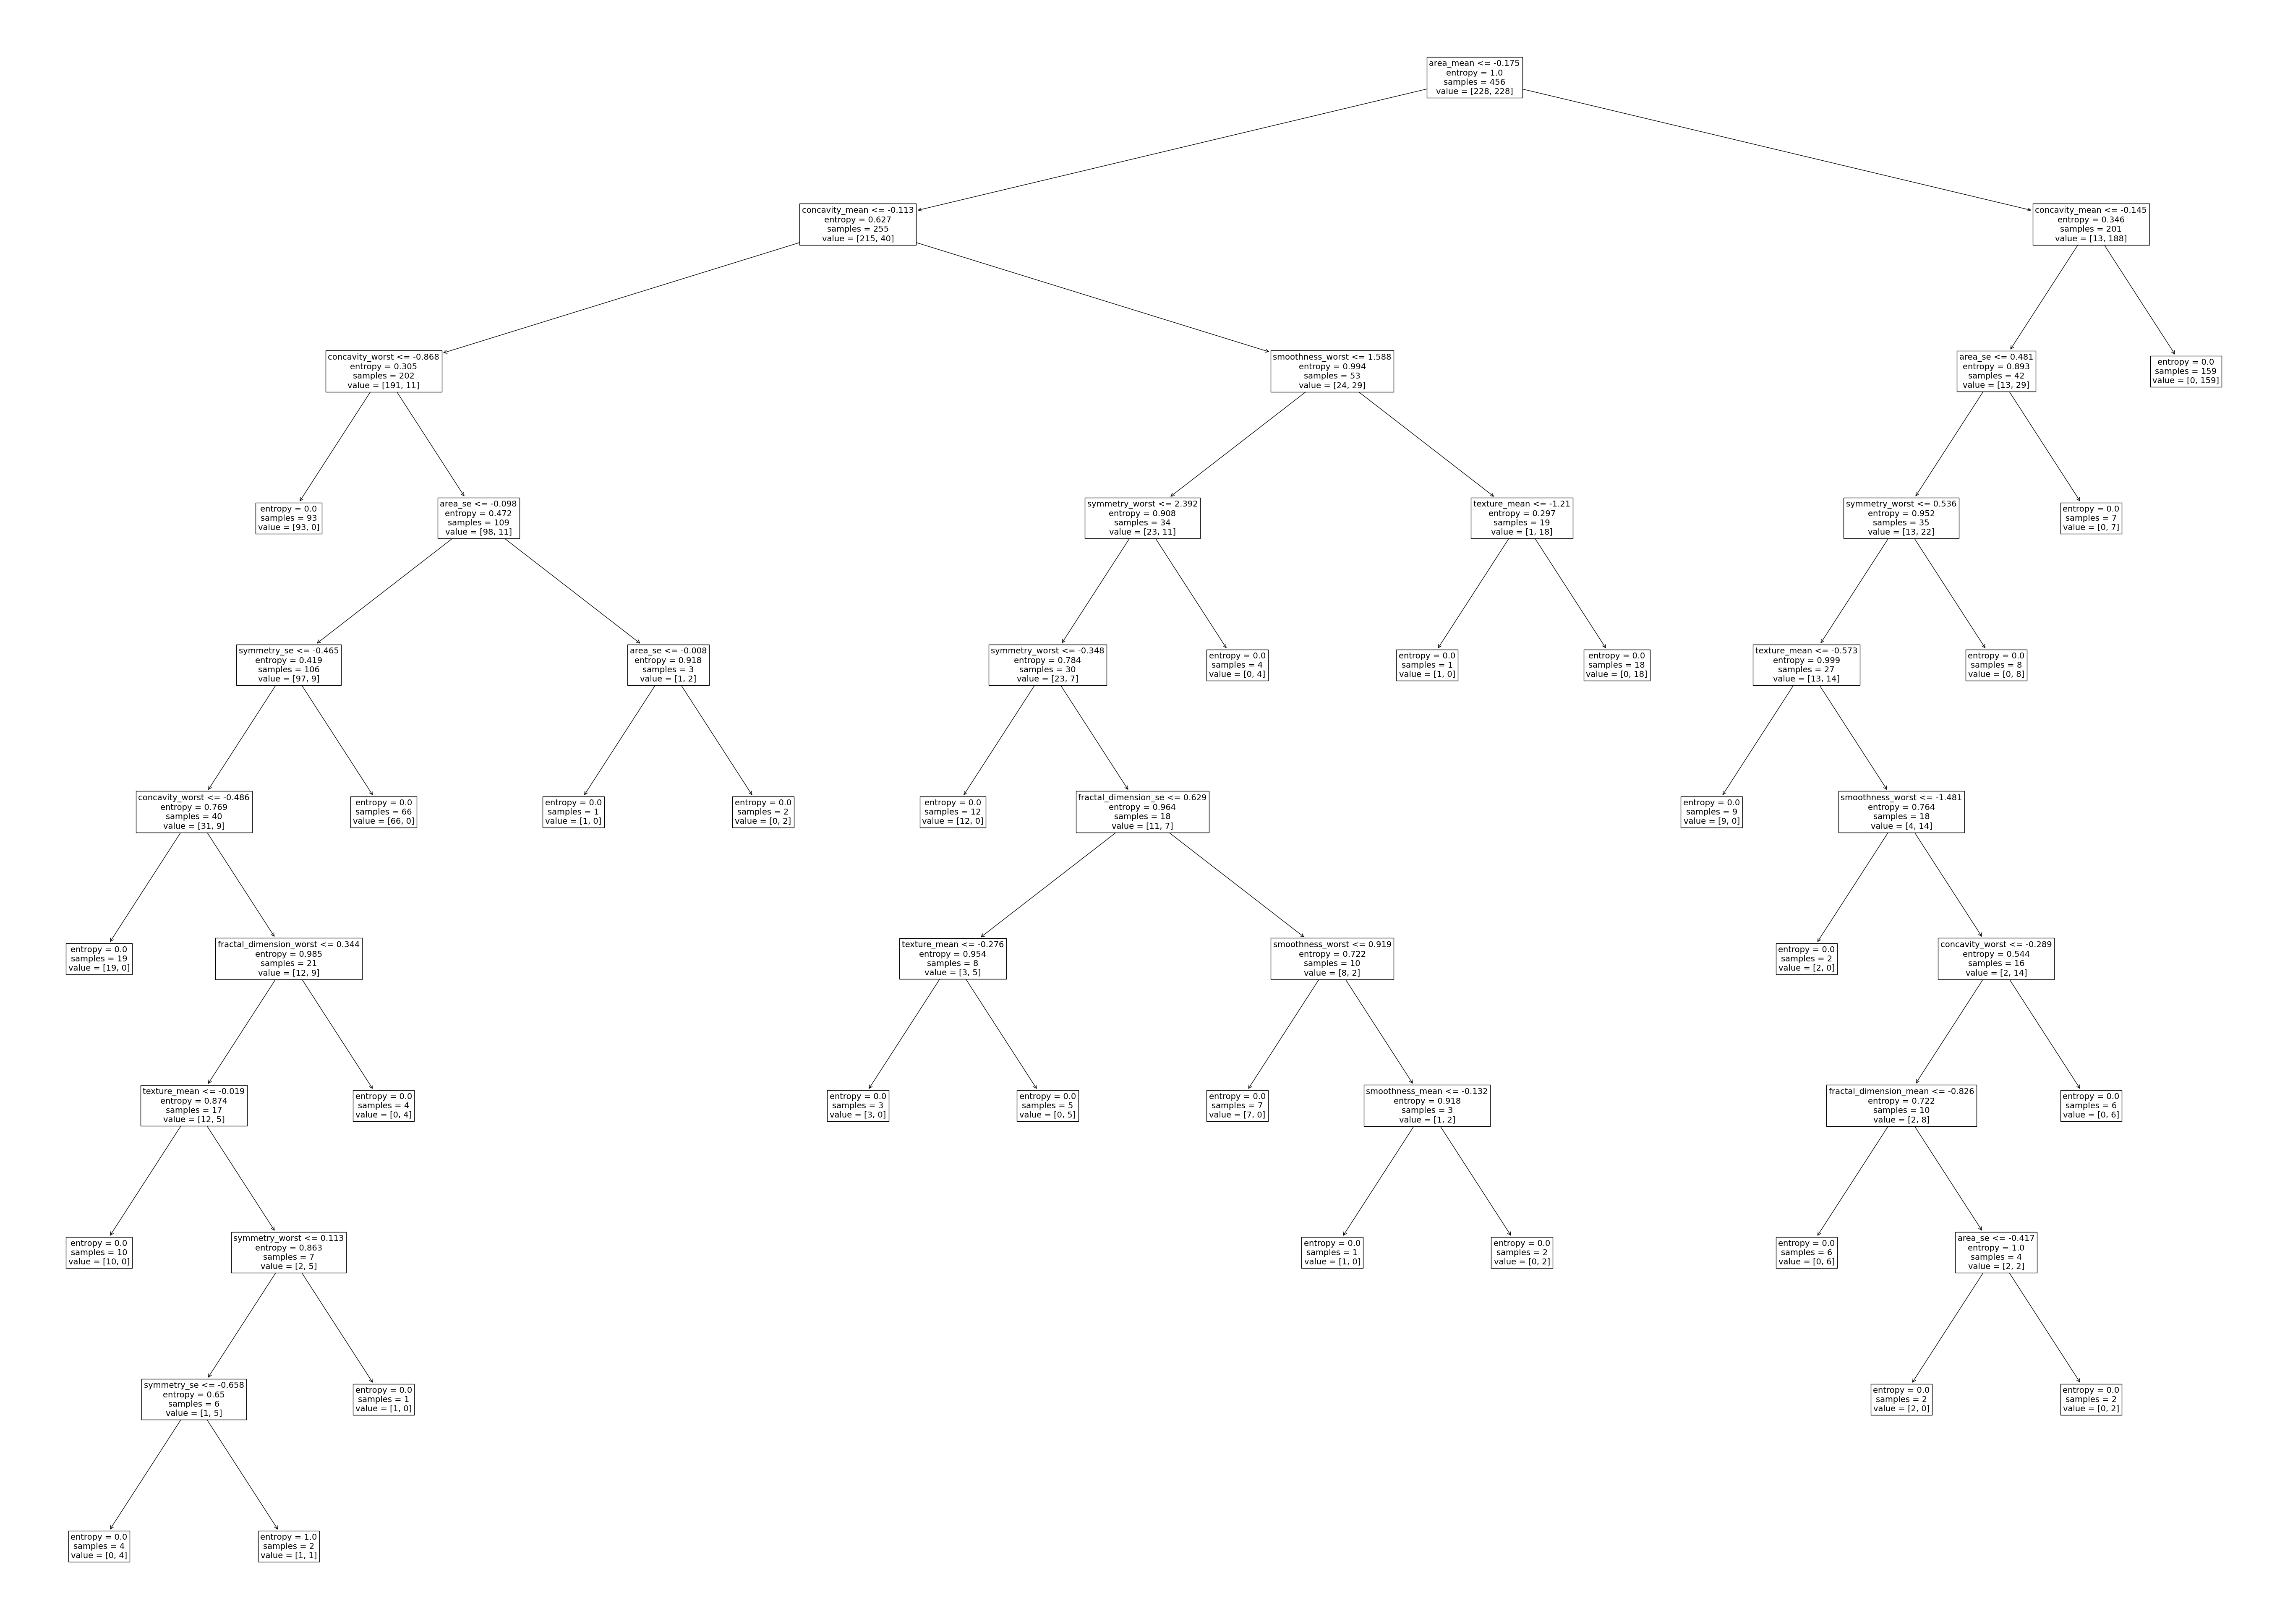

In [15]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(loaded_model3, feature_names=x_train.columns, fontsize=14)

In [29]:
loaded_model4 = joblib.load('../DTC/models_progress3/param1/dtc_split4.joblib')

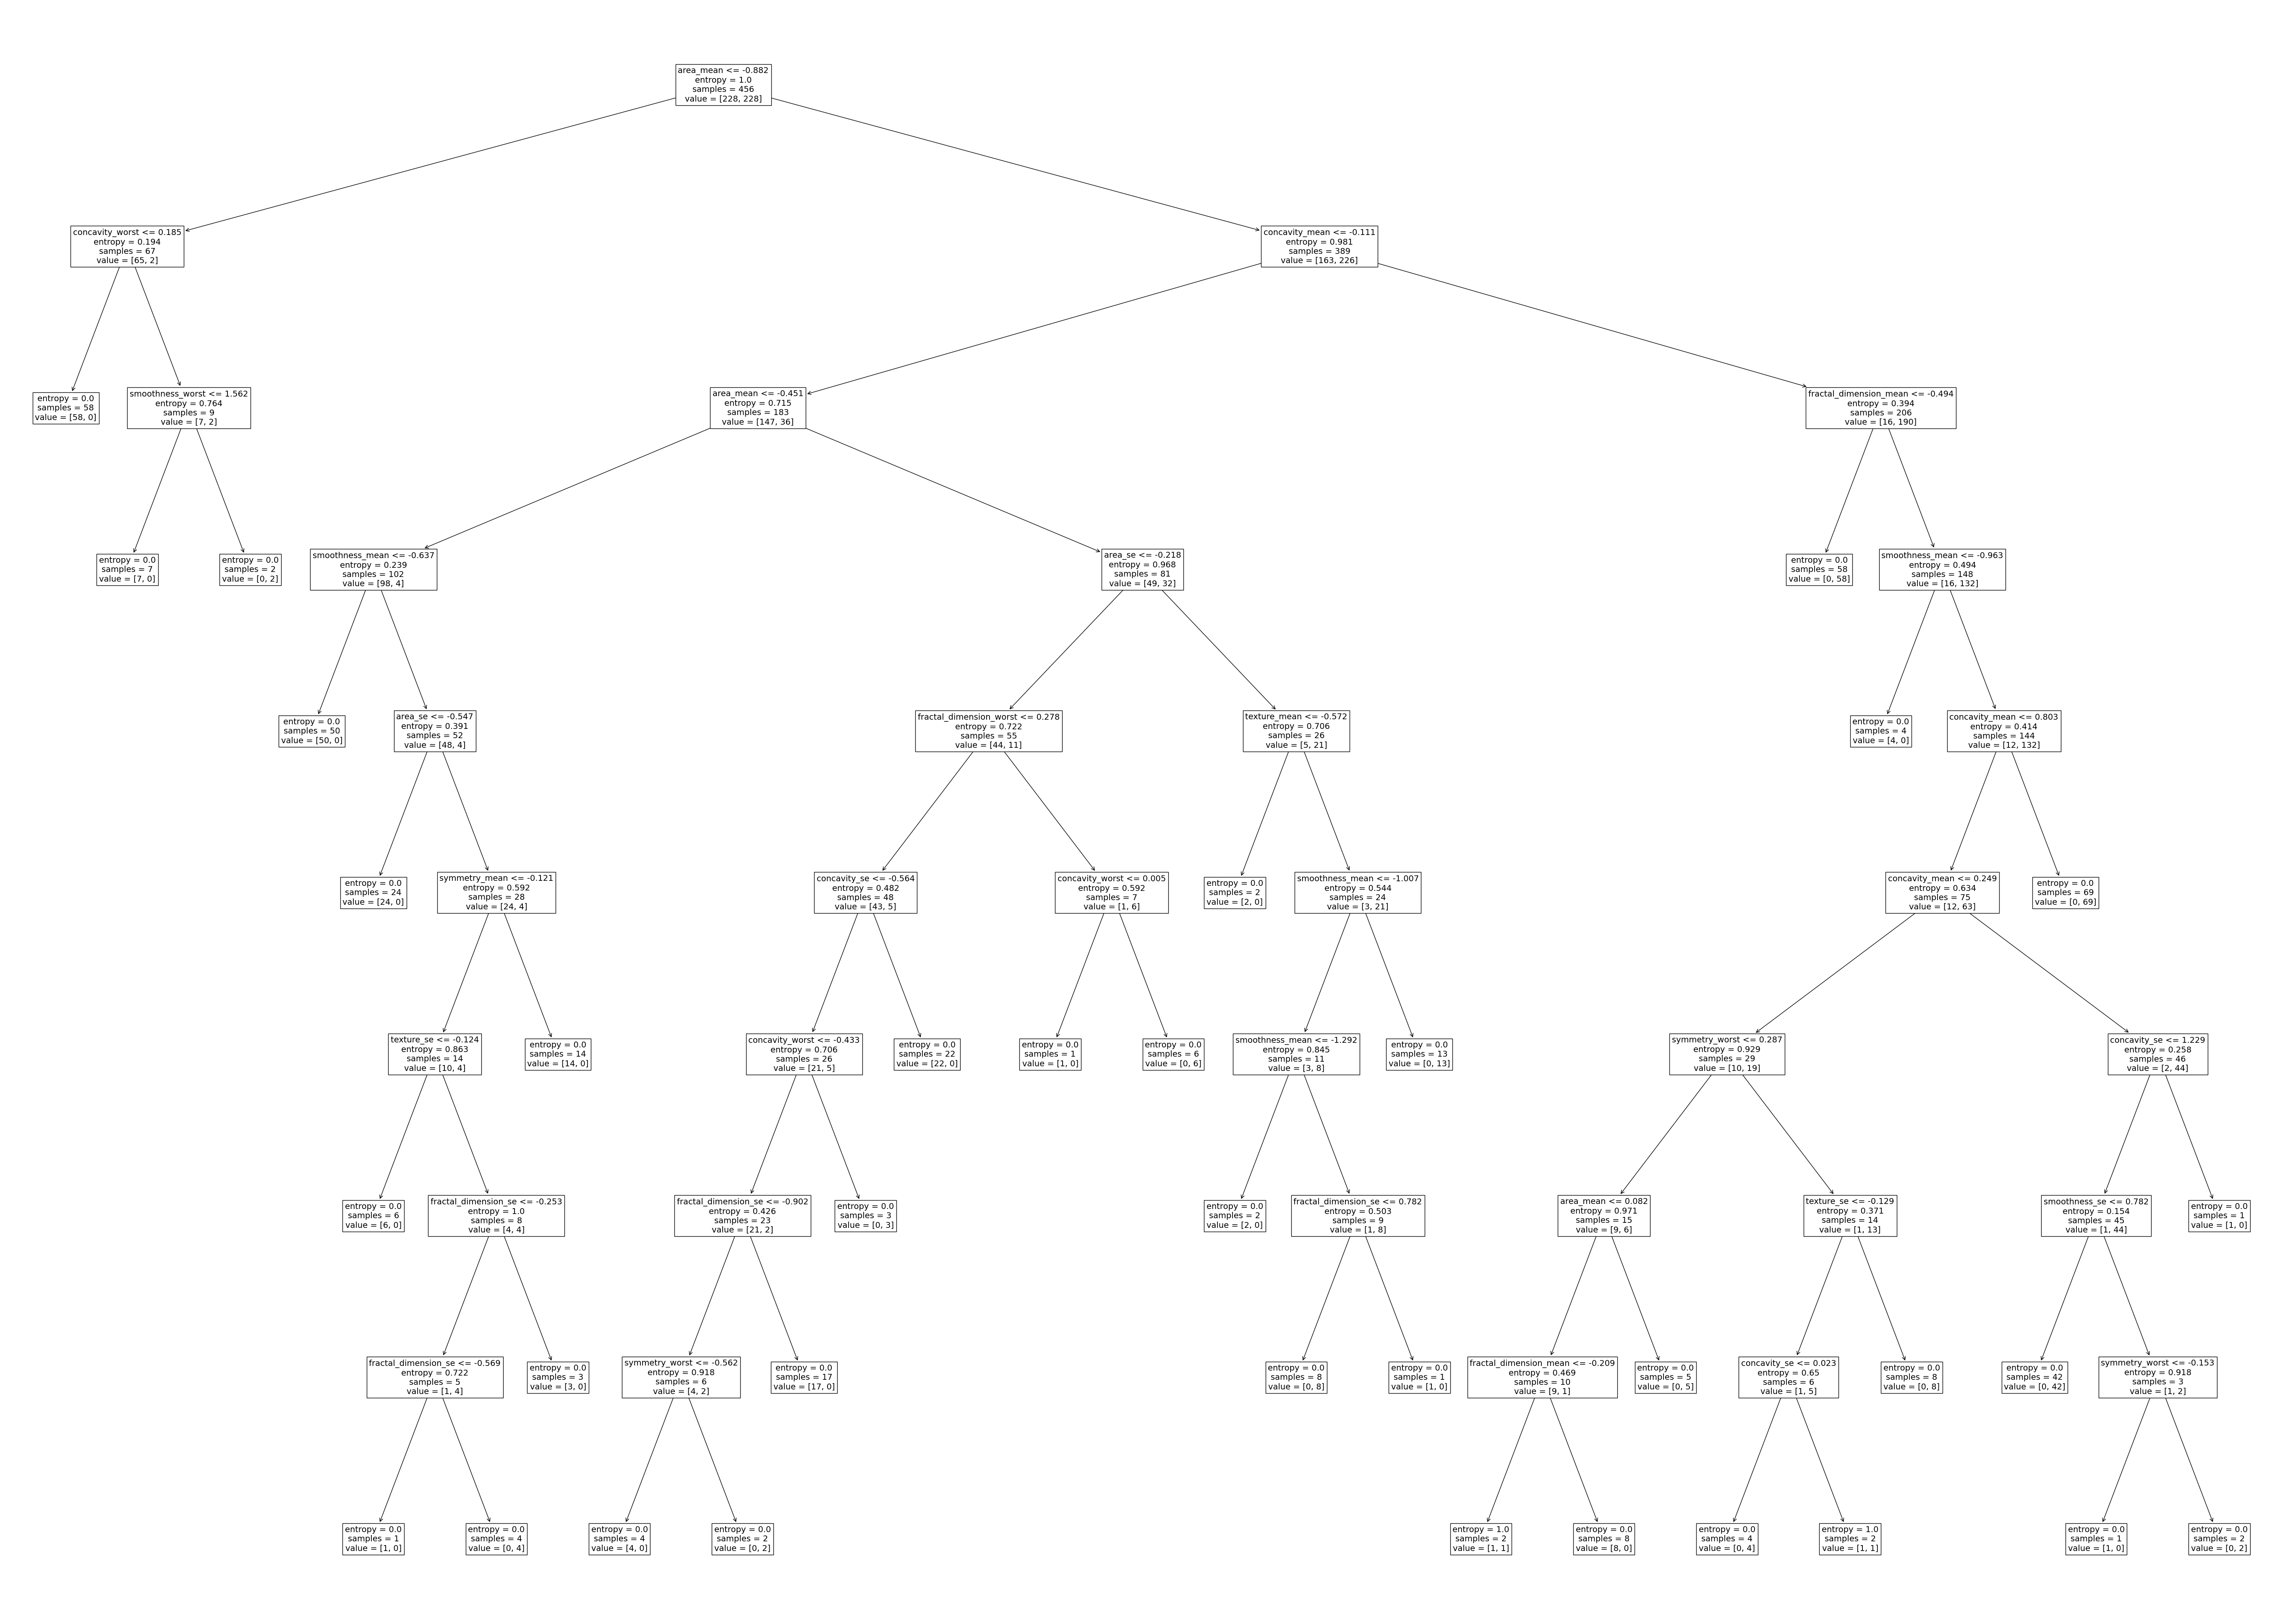

In [17]:
# fig = plt.figure(figsize=(70,50))
# _ = tree.plot_tree(loaded_model4, feature_names=x_train.columns, fontsize=14)

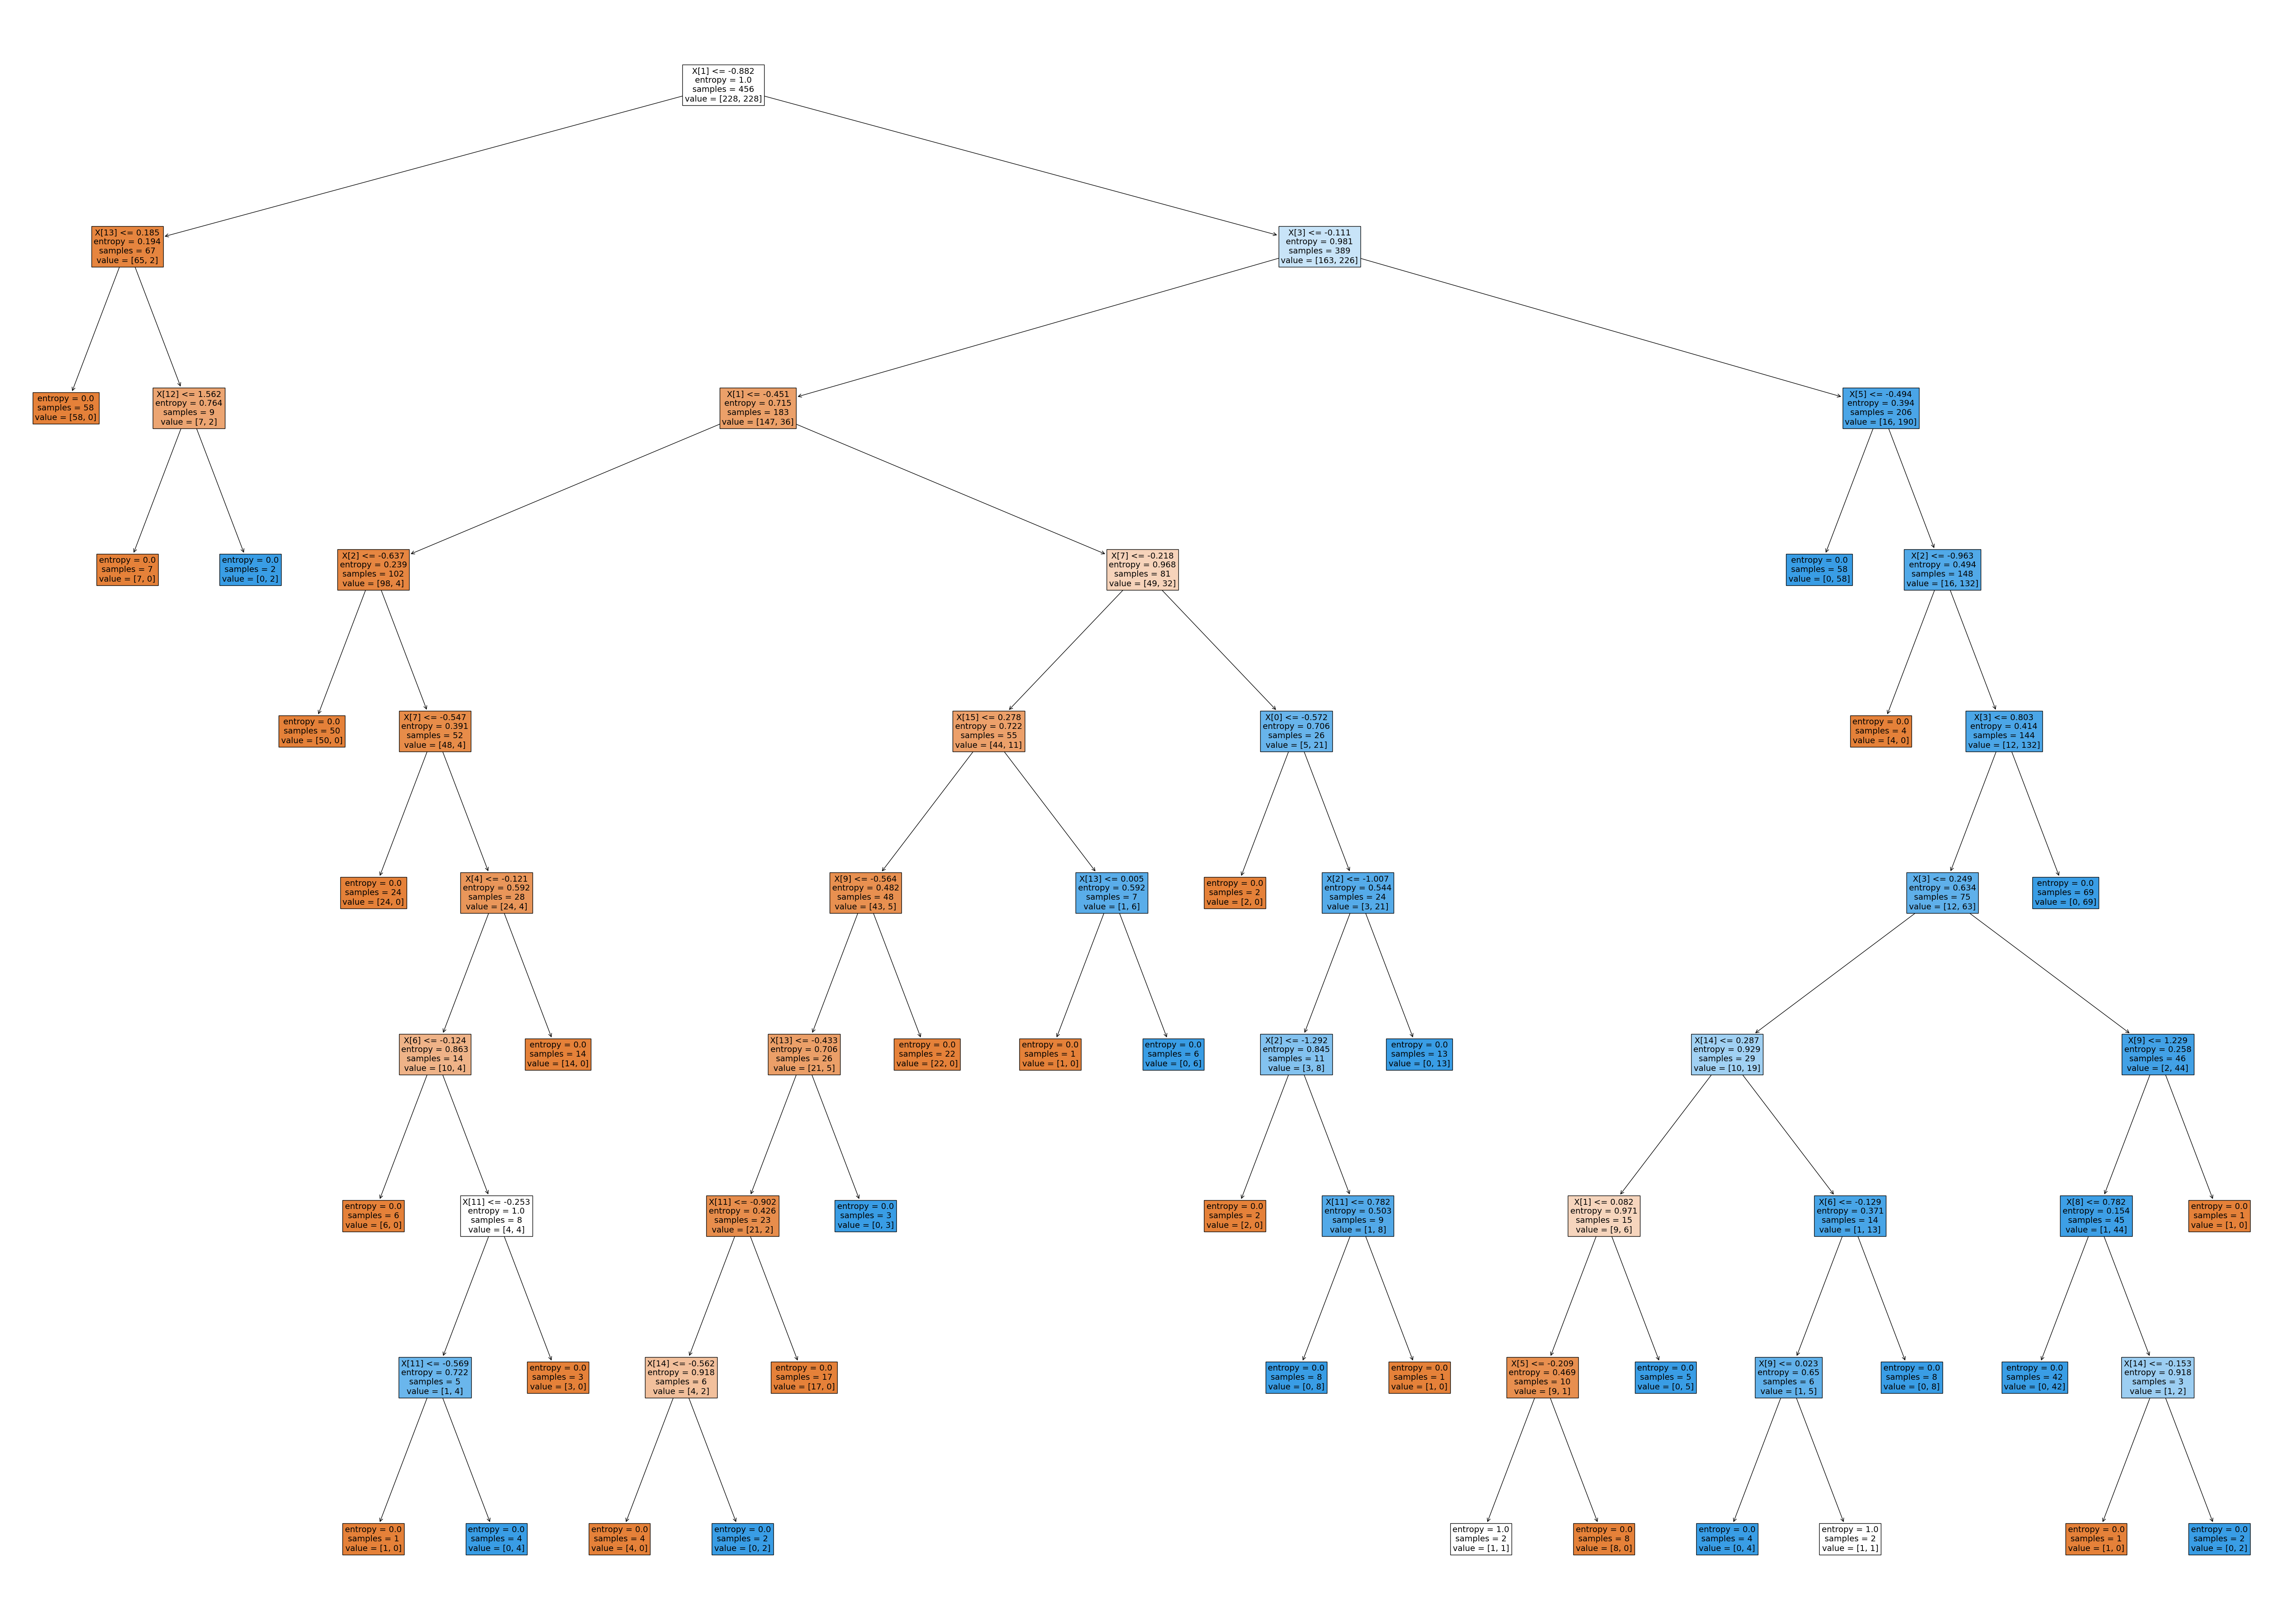

In [33]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(loaded_model4, fontsize=14, filled=True)

In [34]:
n_nodes = loaded_model4.tree_.node_count
children_left = loaded_model4.tree_.children_left
children_right = loaded_model4.tree_.children_right
feature = loaded_model4.tree_.feature
threshold = loaded_model4.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 69 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= -0.8819285481509672 else to node 6.
	node=1 is a split node: go to node 2 if X[:, 13] <= 0.18510409592376198 else to node 3.
		node=2 is a leaf node.
		node=3 is a split node: go to node 4 if X[:, 12] <= 1.5622315216645455 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
	node=6 is a split node: go to node 7 if X[:, 3] <= -0.11147770194301443 else to node 44.
		node=7 is a split node: go to node 8 if X[:, 1] <= -0.4508755378164067 else to node 21.
			node=8 is a split node: go to node 9 if X[:, 2] <= -0.6365640726425636 else to node 10.
				node=9 is a leaf node.
				node=10 is a split node: go to node 11 if X[:, 7] <= -0.5468781498502159 else to node 12.
					node=11 is a leaf node.
					node=12 is a split node: go to node 13 if X[:, 4] <= -0.12137309263308715 else to node 20.
						node=13 is a split node: go to node 14 if X[:, 6] <= -0.1

In [24]:
loaded_model5 = joblib.load('../DTC/models_progress3/param1/dtc_split5.joblib')

In [32]:
# fig = plt.figure(figsize=(70,50))
# _ = tree.plot_tree(loaded_model5, feature_names=x_train.columns, fontsize=14, filled=True)

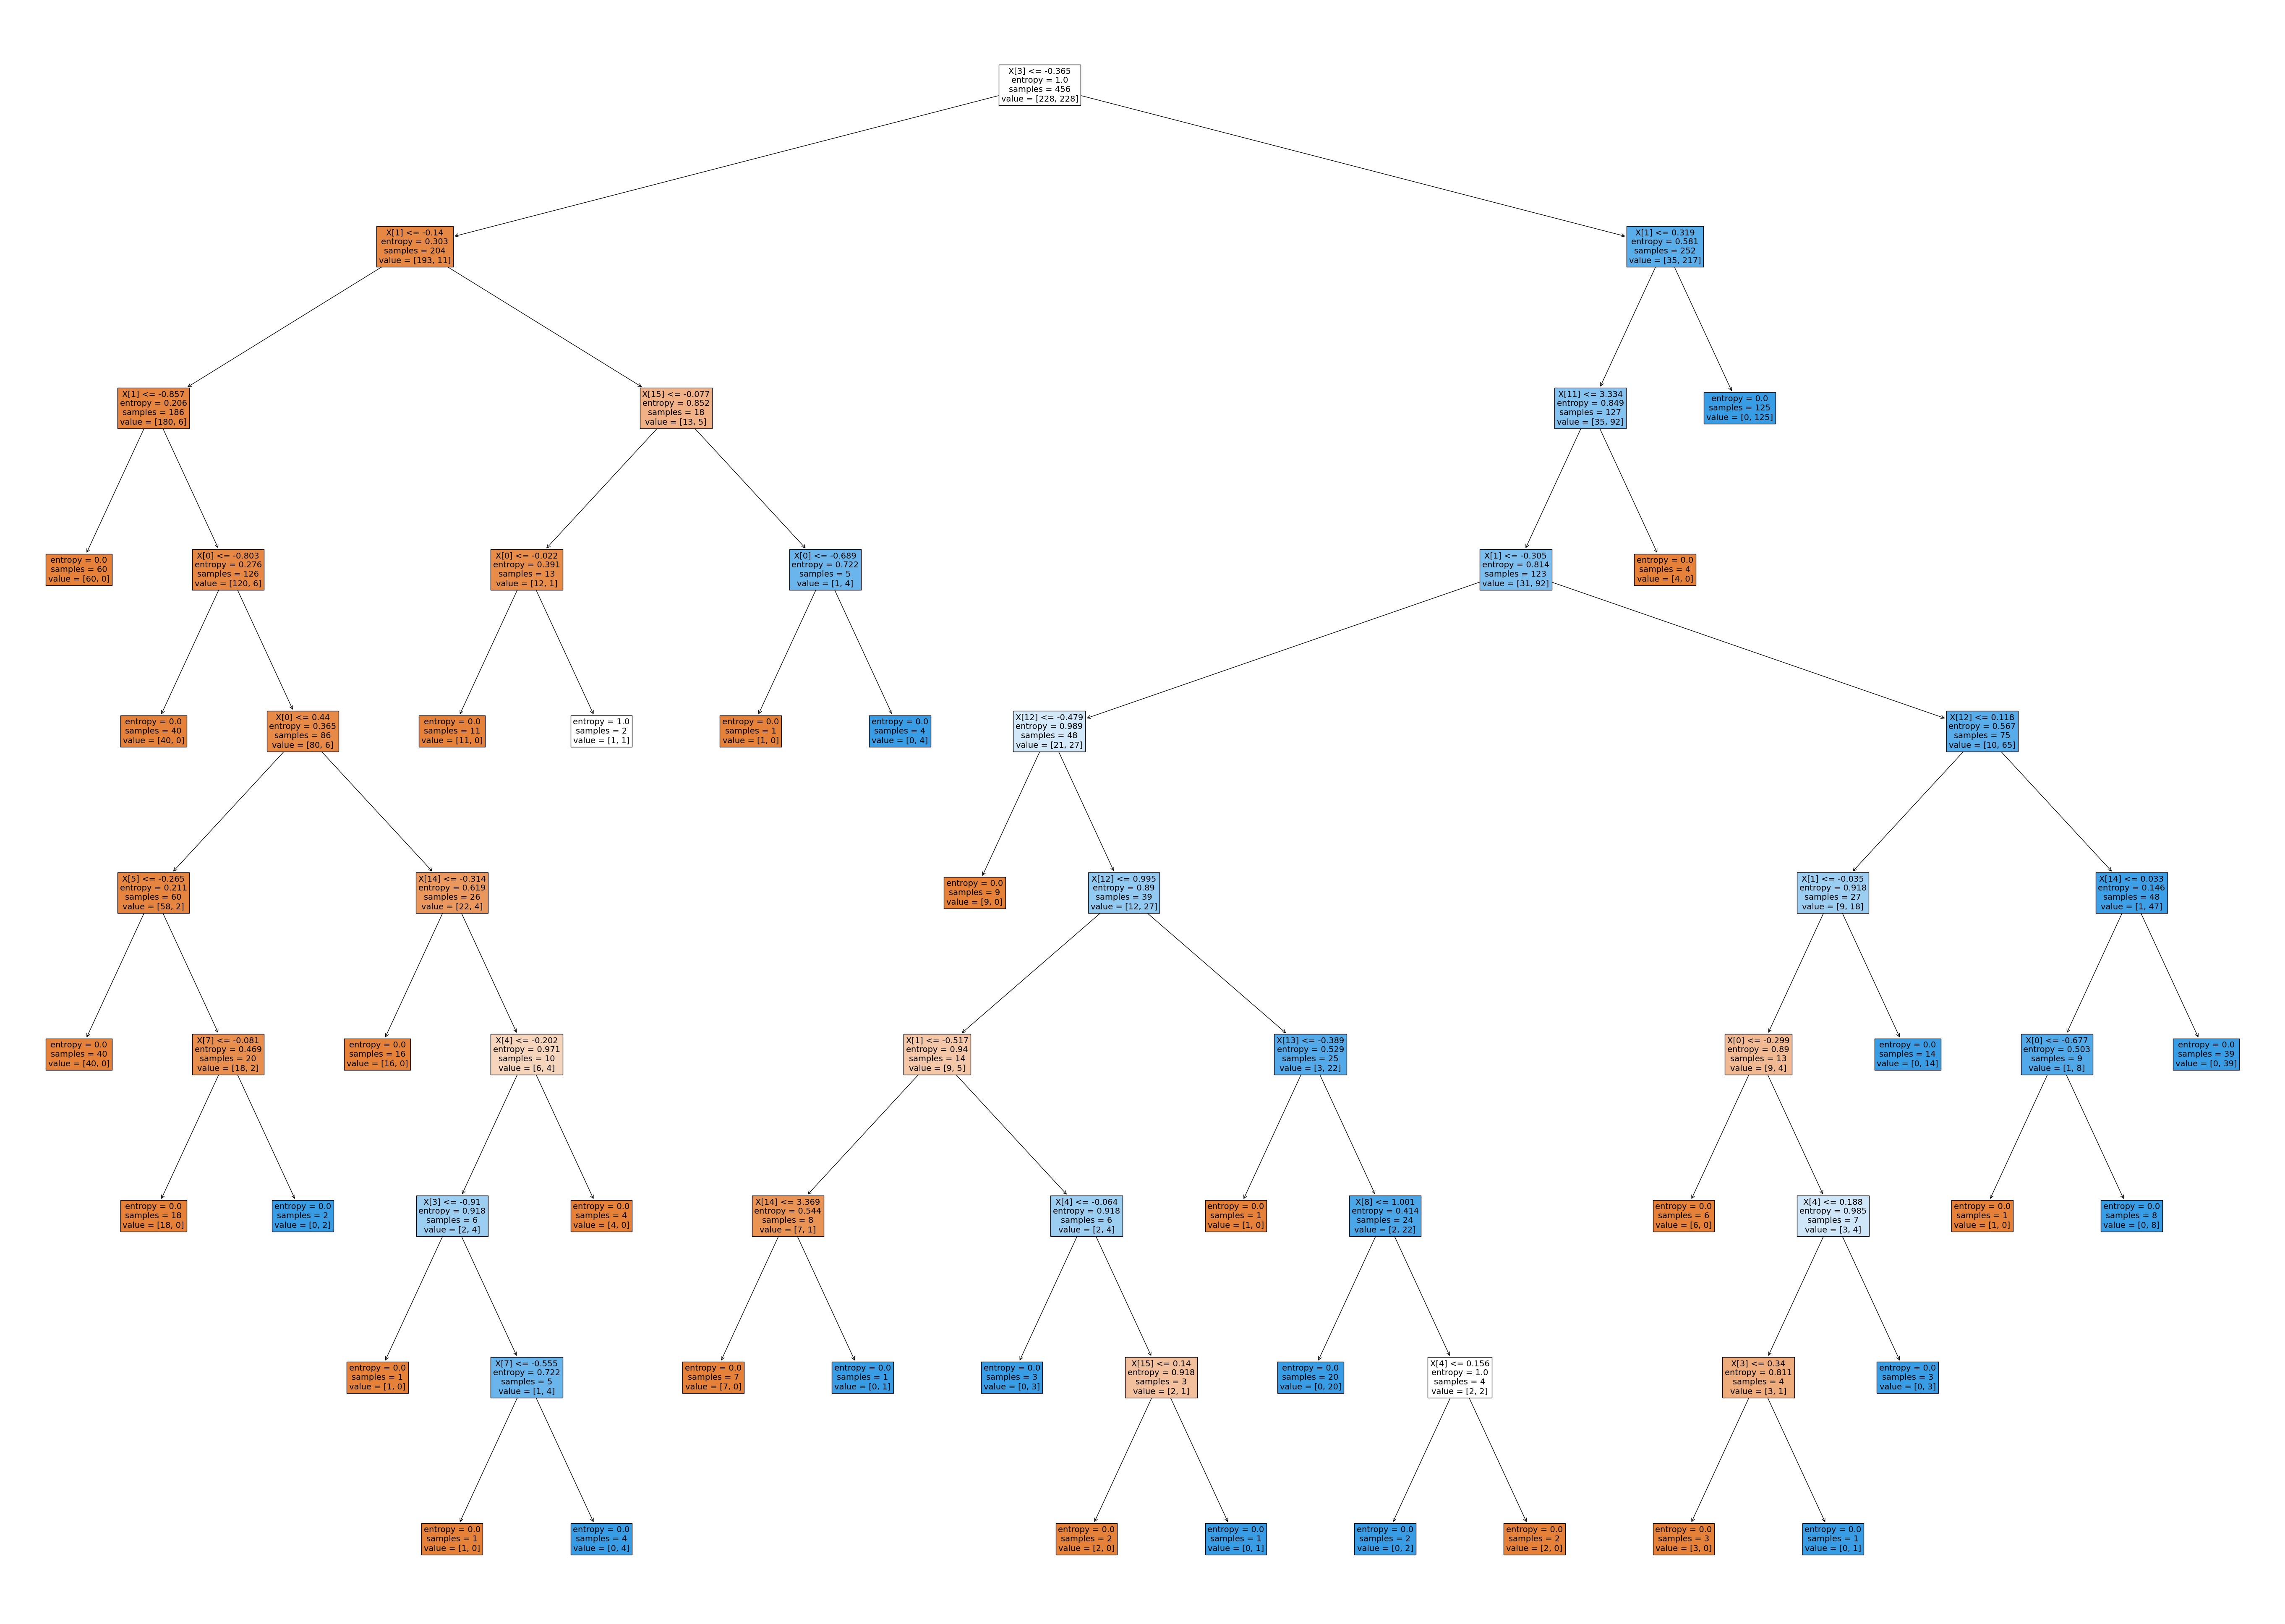

In [27]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(loaded_model5, fontsize=14, filled=True)

In [28]:
n_nodes = loaded_model5.tree_.node_count
children_left = loaded_model5.tree_.children_left
children_right = loaded_model5.tree_.children_right
feature = loaded_model5.tree_.feature
threshold = loaded_model5.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 67 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= -0.3650186406011414 else to node 28.
	node=1 is a split node: go to node 2 if X[:, 1] <= -0.13969761684779414 else to node 21.
		node=2 is a split node: go to node 3 if X[:, 1] <= -0.8566812870018159 else to node 4.
			node=3 is a leaf node.
			node=4 is a split node: go to node 5 if X[:, 0] <= -0.8028528613780757 else to node 6.
				node=5 is a leaf node.
				node=6 is a split node: go to node 7 if X[:, 0] <= 0.4398728566368033 else to node 12.
					node=7 is a split node: go to node 8 if X[:, 5] <= -0.26509048942145763 else to node 9.
						node=8 is a leaf node.
						node=9 is a split node: go to node 10 if X[:, 7] <= -0.08126093983571847 else to node 11.
							node=10 is a leaf node.
							node=11 is a leaf node.
					node=12 is a split node: go to node 13 if X[:, 14] <= -0.31413227028703694 else to node 14.
						node=13 is a leaf node.
						node=14 